In [36]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16

#import generic model class
from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')

#import random
import random
from random import randrange


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.optimizers import Adam

from PIL import Image
import os

#function for fast generation of training and test set from data
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AvgPool2D

In [41]:
# Define image size and other parameterst
DIMENSION = 250
img_width, img_height = 250, 250
batchsize = 32
epochs = 10
num_of_class = 2

train = keras. utils.image_dataset_from_directory(
    directory='/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

validation = keras. utils.image_dataset_from_directory(
    directory='/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory='/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


2023-08-18 18:00:24.545295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5216]
	 [[{{node Placeholder/_4}}]]
2023-08-18 18:00:24.545560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]


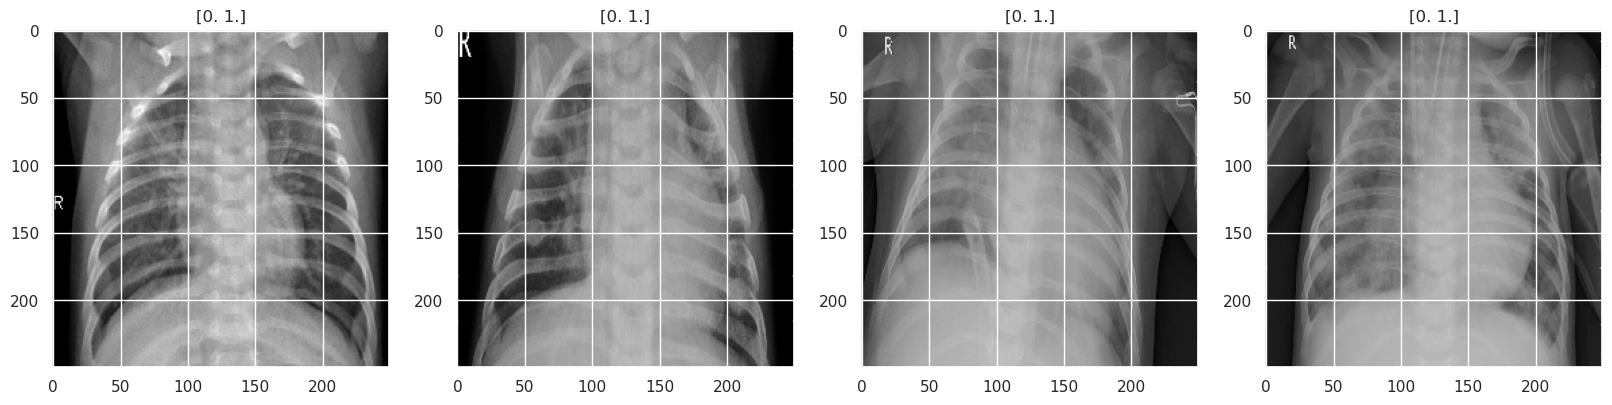

In [42]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [39]:
#Data loading

#TRAINING
def load_train_data():
    X_train = []
    y_train = []
    Path_normal = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/train/NORMAL', 0)
    Path_pneumonia = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/train/PNEUMONIA', 1)
    
    for path in [Path_pneumonia, Path_normal]:
        for dirname, _, filenames in os.walk(path[0]):
            for filename in filenames:
                img_location = os.path.join(dirname, filename)

                # load the image and convert into numpy array
                img = Image.open(img_location).convert('L')
                image_resized = img.resize((DIMENSION, DIMENSION))

                # asarray() class is used to convert PIL images into NumPy arrays
                numpydata = np.asarray(image_resized)

                # Append the image to a list
                X_train.append(numpydata)
                y_train.append(path[1])
    
    return X_train, y_train

#VALIDATION
def load_val_data():
    X_val = []
    y_val = []
    Path_normal = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/val/NORMAL', 0)
    Path_pneumonia = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/val/PNEUMONIA', 1)
    
    for path in [Path_pneumonia, Path_normal]:
        for dirname, _, filenames in os.walk(path[0]):
            for filename in filenames:
                img_location = os.path.join(dirname, filename)

                # load the image and convert into numpy array
                img = Image.open(img_location).convert('L')
                image_resized = img.resize((DIMENSION, DIMENSION))

                # asarray() class is used to convert PIL images into NumPy arrays
                numpydata = np.asarray(image_resized)

                # Append the image to a list
                X_val.append(numpydata)
                y_val.append(path[1])
    
    return X_val, y_val


#TESTING
def load_test_data():
    X_test = []
    y_test = []
    Path_normal = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/test/NORMAL', 0)
    Path_pneumonia = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/test/PNEUMONIA', 1)
    
    for path in [Path_pneumonia, Path_normal]:
        for dirname, _, filenames in os.walk(path[0]):
            for filename in filenames:
                img_location = os.path.join(dirname, filename)

                # load the image and convert into numpy array
                img = Image.open(img_location).convert('L')
                image_resized = img.resize((DIMENSION, DIMENSION))

                # asarray() class is used to convert PIL images into NumPy arrays
                numpydata = np.asarray(image_resized)

                # Append the image to a list
                X_test.append(numpydata)
                y_test.append(path[1])
    
    return X_test, y_test


In [40]:
(X_train, y_train) = load_train_data()

UnidentifiedImageError: cannot identify image file '/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/train/PNEUMONIA/.DS_Store'

In [32]:
#TRAINING
def load_train_data():
    X_train = []
    y_train = []
    Path_normal = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/train/NORMAL', 0)
    Path_pneumonia = ('/home/giac/Desktop/prova/pneumonia/chest_xray/chest_xray/train/PNEUMONIA', 1)
    
    for path in [Path_pneumonia, Path_normal]:
        for dirname, _, filenames in os.walk(path[0]):
            for filename in filenames:
                img_location = os.path.join(dirname, filename)

In [34]:
print(load_train_data())

None


In [ ]:
# Extracting Features and Labels
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    X_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in validation:
    X_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

2023-08-18 16:46:34.120059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [624]
	 [[{{node Placeholder/_4}}]]
2023-08-18 16:46:34.124723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [624]
	 [[{{node Placeholder/_4}}]]


In [1]:
val_size = .1

#generate training and test set with stratification
#this means that we will find the same proportion of classes bot in the validation and in the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, stratify=y_train)

#rescale pixel values to the range (0,1)
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

#transform integer label into one-hot encodings
n_classes=2

y_train_cat = keras.utils.to_categorical(y_train, n_classes)
y_val_cat = keras.utils.to_categorical(y_val, n_classes)
y_test_cat = keras.utils.to_categorical(y_test, n_classes)


NameError: name 'train_test_split' is not defined